**EDA-1 Bike Details Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [23]:
#ques 1 What is the range of selling prices in the dataset?
df=pd.read_csv('/BIKE DETAILS.csv')
display(df.head())
min_price=df['selling_price'].min()
max_price=df['selling_price'].max()
price_range=(min_price,max_price)
print("selling price range:", price_range)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


selling price range: (5000, 760000)


In [24]:
#ques 2 What is the median selling price for bikes in the dataset ?

median_price=df['selling_price'].median()
print("median selling price:",median_price)

median selling price: 45000.0


In [27]:
#ques 3 What is the most common seller type ?
most_common_seller = df['seller_type'].mode()[0]
print("Most Common Seller Type:", most_common_seller)

Most Common Seller Type: Individual


In [28]:
#ques 4.  How many bikes have driven more than 50,000 kilometers?

bikes_above_50k = df[df['km_driven'] > 50000]
count = len(bikes_above_50k)
print("Number of bikes driven more than 50,000 km:", count)

Number of bikes driven more than 50,000 km: 170


In [29]:
#. 5 What is the average km_driven value for each ownership type
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [30]:
# ques 6 What proportion of bikes are from the year 2015 or older
proportion_2015_or_older = (df['year'] <= 2015).sum() / len(df)
print("Proportion of bikes from 2015 or older:", proportion_2015_or_older)

Proportion of bikes from 2015 or older: 0.5664467483506126


In [31]:
#ques 7 # 7.What is the trend of missing values across the dataset
missing_values = df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [32]:
#ques 8  What is the highest ex_showroom_price recorded, and for which bike
max_price = df['ex_showroom_price'].max()
bike_with_max_price = df[df['ex_showroom_price'] == max_price][['name', 'ex_showroom_price']]
print(bike_with_max_price)

                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [33]:
#ques 9  What is the total number of bikes listed by each seller type
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


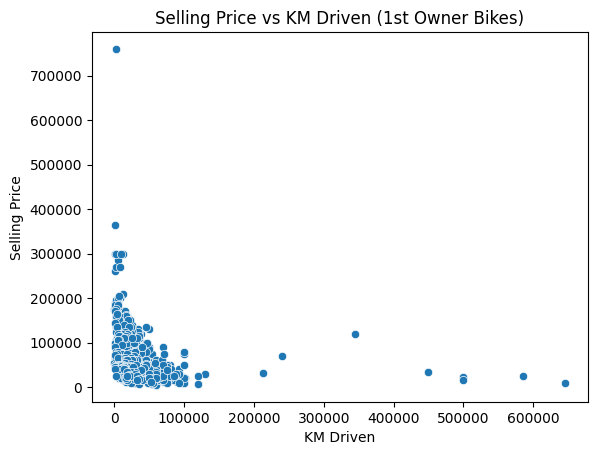

In [34]:
#ques 10   What is the relationship between selling_price and km_driven for first-owner bikes
first_owner = df[df['owner'] == '1st owner']
sns.scatterplot(data=first_owner, x='km_driven', y='selling_price')
plt.title('Selling Price vs KM Driven (1st Owner Bikes)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

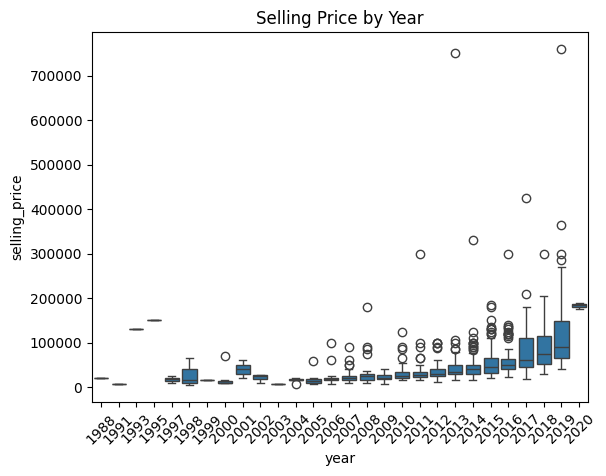

In [36]:
#ques 11  Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title('Selling Price by Year')
plt.show()

In [37]:
#ques 12  Perform a bivariate analysis to visualize the relationship between year and selling_priceimport datetime
import datetime
current_year = datetime.datetime.now().year
df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print(avg_depreciation)

age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [38]:
#ques 13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year
year_avg = df.groupby('year')['selling_price'].mean().reset_index()
merged = df.merge(year_avg, on='year', suffixes=('', '_year_avg'))
outliers = merged[merged['selling_price'] > 1.5 * merged['selling_price_year_avg']]
print(outliers[['name', 'year', 'selling_price']])

                                     name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


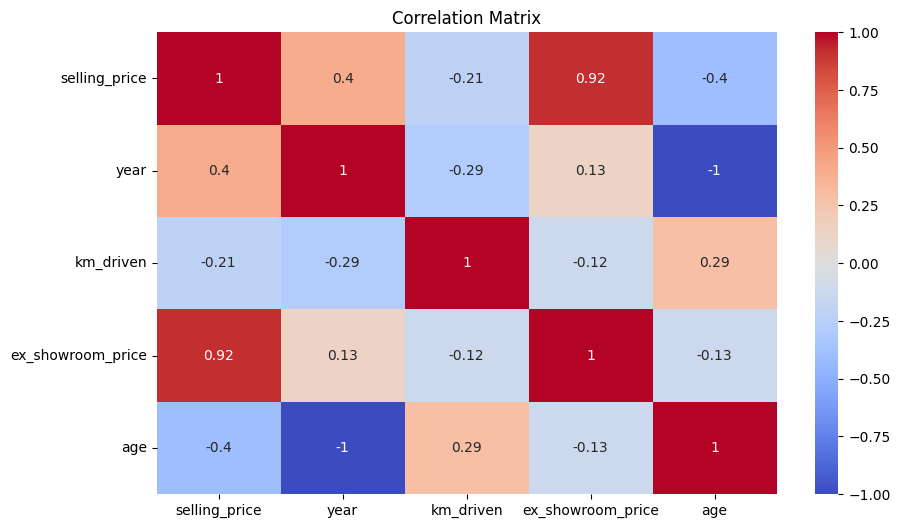

In [39]:
# ques 14  Which bike names are priced significantly above the average price for their manufacturing year
numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# ques 15  Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

**EDA-2 Car Sale Dataset**

In [43]:
df_car=pd.read_csv('/Car Sale.csv')


In [44]:
# ques 1 What is the average selling price of cars for each dealer, and how does it compare across different dealer
dealer_avg_price = df_car.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
print(dealer_avg_price.head(10))

Dealer_Name
U-Haul CO                            28769.919006
Classic Chevy                        28602.014446
Rabun Used Car Sales                 28527.536177
Iceberg Rentals                      28522.958533
Enterprise Rent A Car                28312.580800
Scrivener Performance Engineering    28297.371589
Gartner Buick Hyundai Saab           28247.621019
Saab-Belle Dodge                     28190.139888
Capitol KIA                          28189.703822
Race Car Help                        28163.372706
Name: Price ($), dtype: float64


In [45]:
#ques 2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
brand_price_std = df_car.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
print("Highest price variation:\n", brand_price_std.head(5))

Highest price variation:
 Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64


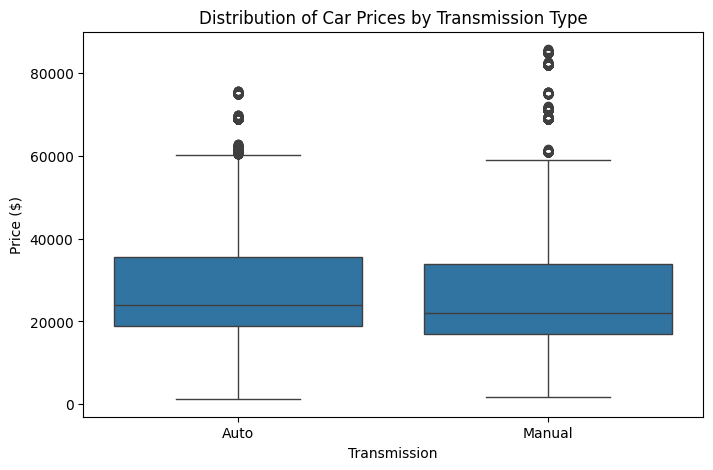

In [46]:
#ques 3   What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_car, x="Transmission", y="Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()

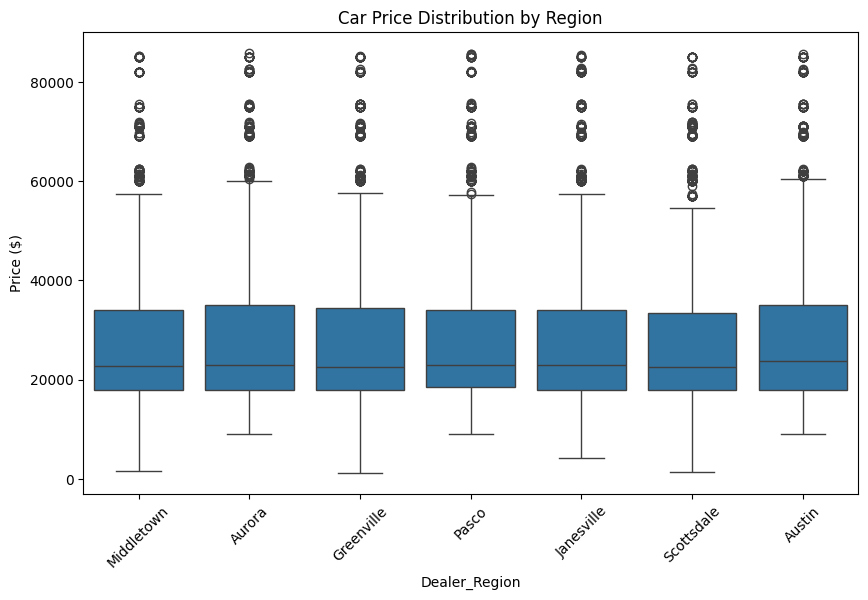

In [47]:
# ques 4 What is the distribution of car prices across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car, x="Dealer_Region", y="Price ($)")
plt.title("Car Price Distribution by Region")
plt.xticks(rotation=45)
plt.show()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


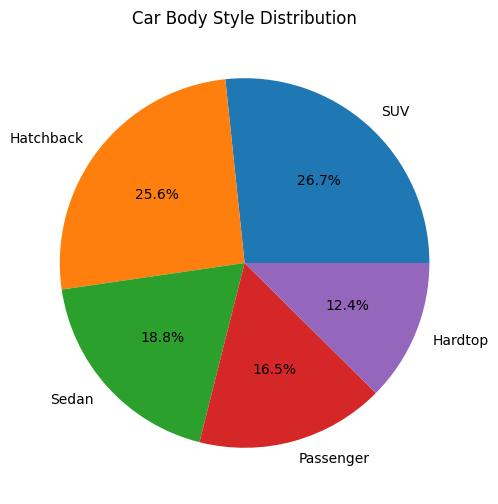

In [48]:
#ques 5  What is the distribution of cars based on body styles
body_style_counts = df_car["Body Style"].value_counts()
print(body_style_counts)
body_style_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Car Body Style Distribution')
plt.ylabel("")
plt.show()

In [49]:
# ques 6  How does the average selling price of cars vary by customer gender and annual income
gender_income_price = df_car.groupby("Gender")[["Annual Income", "Price ($)"]].mean()
print(gender_income_price)

        Annual Income     Price ($)
Gender                             
Female  755973.021339  28277.265270
Male    851184.044207  28039.429407


In [50]:
#ques 7  What is the distribution of car prices by region, and how does the number of cars sold vary by region
region_price_stats = df_car.groupby("Dealer_Region")["Price ($)"].describe()
print(region_price_stats[["count", "mean", "50%", "std"]])

                count          mean      50%           std
Dealer_Region                                             
Aurora         3130.0  28334.626837  23000.0  15026.207252
Austin         4135.0  28341.603628  23801.0  14903.884549
Greenville     3128.0  28180.819054  22500.0  15101.538328
Janesville     3821.0  27833.350955  23000.0  14344.995638
Middletown     3128.0  27856.338875  22750.0  14619.842395
Pasco          3131.0  28119.039923  23000.0  14659.315941
Scottsdale     3433.0  27954.958928  22600.0  14902.916820


In [51]:
#ques 8 How does the average car price differ between cars with different engine sizes
engine_price_avg = df_car.groupby("Engine")["Price ($)"].mean().sort_values(ascending=False)
print(engine_price_avg.head())

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [52]:
# ques 9 How do car prices vary based on the customer’s annual income bracket

df_car["Income_Bracket"] = pd.cut(df_car["Annual Income"], bins=[0, 50000, 100000, 500000, 1000000, 2000000],
                                   labels=["<50K", "50K-100K", "100K-500K", "500K-1M", "1M-2M"])

income_price = df_car.groupby("Income_Bracket")["Price ($)"].mean()
print(income_price)

Income_Bracket
<50K         27884.297820
50K-100K     43000.000000
100K-500K    28563.329860
500K-1M      28011.726423
1M-2M        28016.841147
Name: Price ($), dtype: float64


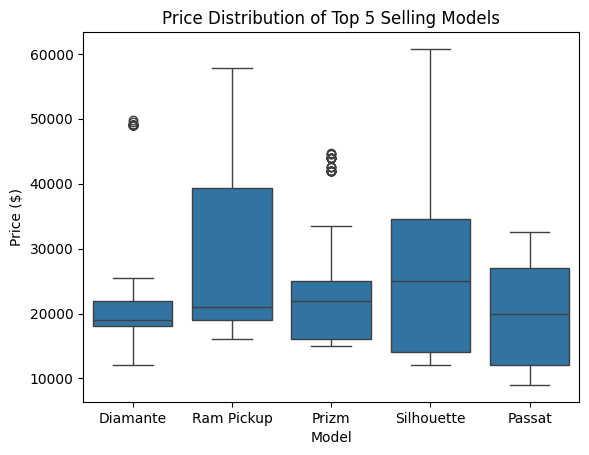

In [53]:
# ques 10 What are the top 5 car models with the highest number of sales, and how does their price distribution look
top_models = df_car["Model"].value_counts().head(5).index
sns.boxplot(data=df_car[df_car["Model"].isin(top_models)], x="Model", y="Price ($)")
plt.title("Price Distribution of Top 5 Selling Models")
plt.show()

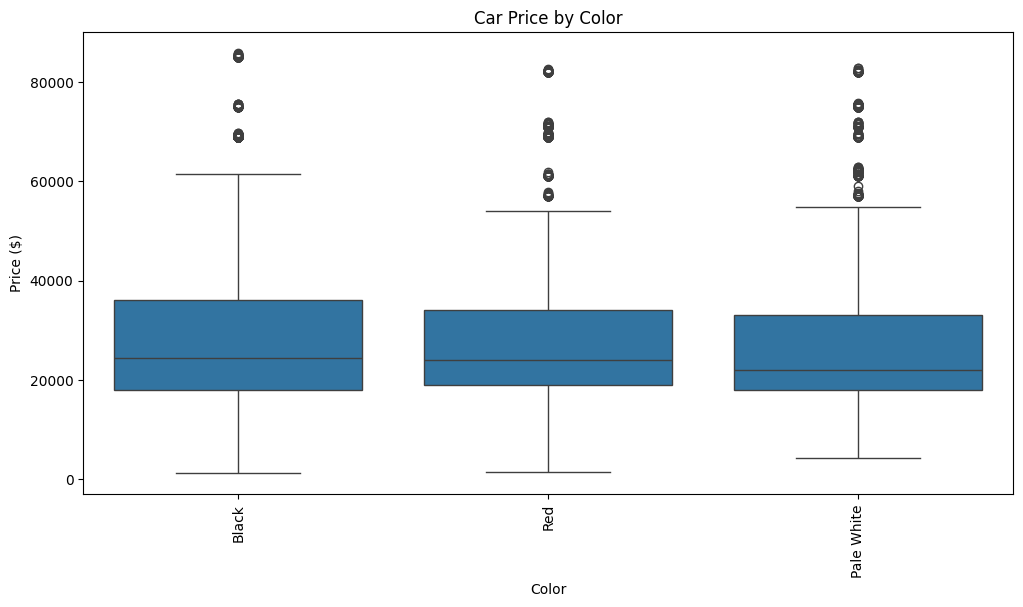

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [54]:
# 11 How does car price vary with engine size across different car colors, and which colors have the highest price variation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_car, x="Color", y="Price ($)")
plt.xticks(rotation=90)
plt.title("Car Price by Color")
plt.show()
color_price_variation = df_car.groupby("Color")["Price ($)"].std().sort_values(ascending=False)
print(color_price_variation.head(5))

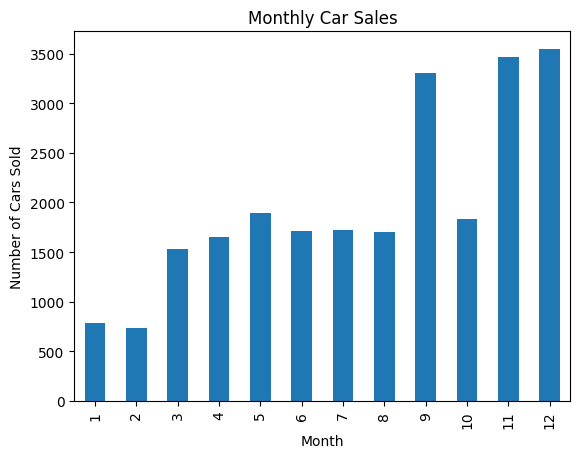

In [55]:
# ques 12  Is there any seasonal trend in car sales based on the date of sale
df_car["Date"] = pd.to_datetime(df_car["Date"])
df_car["Month"] = df_car["Date"].dt.month

sales_per_month = df_car.groupby("Month")["Price ($)"].count()
sales_per_month.plot(kind='bar', title="Monthly Car Sales")
plt.ylabel("Number of Cars Sold")
plt.show()

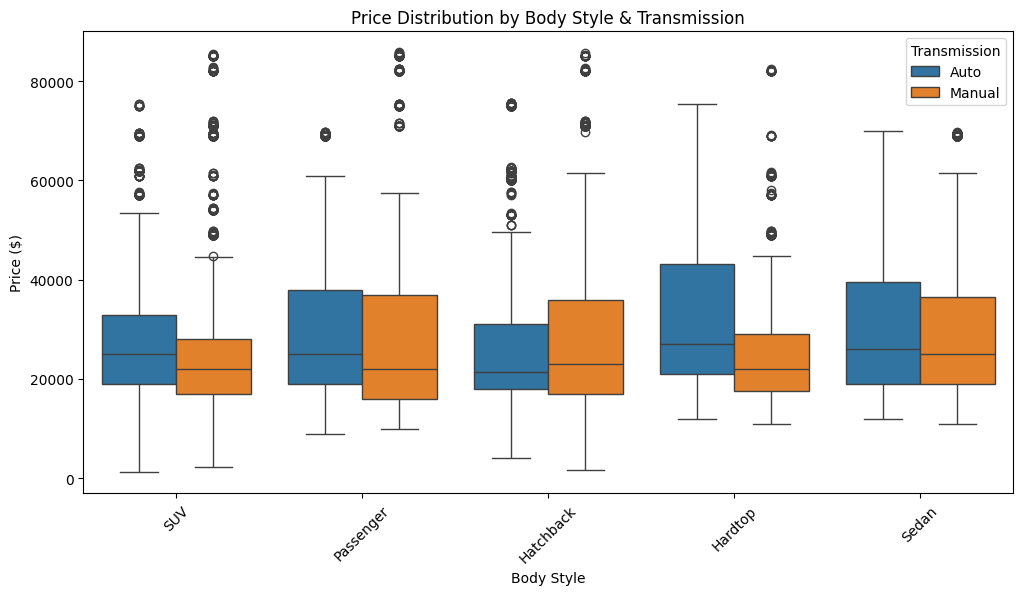

In [56]:
# 13 How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_car, x="Body Style", y="Price ($)", hue="Transmission")
plt.title("Price Distribution by Body Style & Transmission")
plt.xticks(rotation=45)
plt.show()

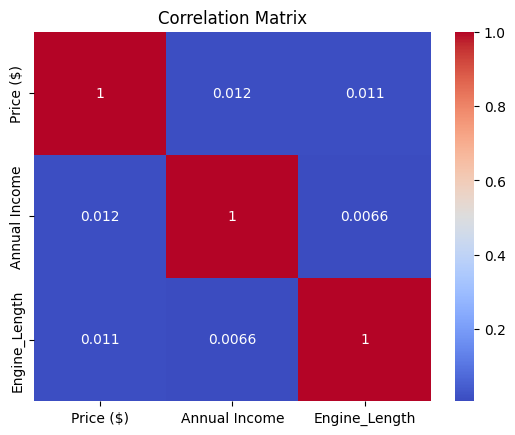

In [57]:
# ques  14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
df_car["Engine_Length"] = df_car["Engine"].astype(str).str.len()  # rough proxy

correlation_df = df_car[["Price ($)", "Annual Income", "Engine_Length"]]
correlation_matrix = correlation_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [58]:
#ques 15 How does the average car price vary across different car models and engine types?
avg_price_model_engine = df_car.groupby(["Model", "Engine"])["Price ($)"].mean().sort_values(ascending=False)
print(avg_price_model_engine.head(10))

Model        Engine                   
SC           Overhead Camshaft            61074.818182
Ranger       DoubleÂ Overhead Camshaft    61064.055556
Sable        Overhead Camshaft            61039.770833
Catera       DoubleÂ Overhead Camshaft    56836.933333
LX470        Overhead Camshaft            54037.490196
LS400        Overhead Camshaft            53157.941558
GS400        Overhead Camshaft            53086.000000
Tacoma       DoubleÂ Overhead Camshaft    53085.821918
Aurora       Overhead Camshaft            51833.556962
Park Avenue  DoubleÂ Overhead Camshaft    49387.750000
Name: Price ($), dtype: float64


**EDA - 3 Amazon Sales Data**

In [59]:
df = pd.read_csv(r'/amazon.csv')

In [61]:
# ques 1  What is the average rating for each product category?
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['category', 'rating'])
avg_rating = df.groupby('category')['rating'].mean().reset_index()
avg_rating = avg_rating.sort_values(by='rating', ascending=False)
print(avg_rating)

                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


In [64]:
# ques 2 What are the top rating_count products by category
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df = df.dropna(subset=['category', 'product_name', 'rating_count'])
df_sorted = df.sort_values(['category', 'rating_count'], ascending=[True, False])
top_products = df_sorted.groupby('category').first().reset_index()
print(top_products[['category', 'product_name', 'rating_count']])

                                             category  \
0   Computers&Accessories|Accessories&Peripherals|...   
1   Computers&Accessories|Accessories&Peripherals|...   
2   Computers&Accessories|Accessories&Peripherals|...   
3   Computers&Accessories|Accessories&Peripherals|...   
4   Computers&Accessories|Accessories&Peripherals|...   
..                                                ...   
78  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
79  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
80  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
81  OfficeProducts|OfficePaperProducts|Paper|Copy&...   
82  OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                         product_name  rating_count  
0   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
1   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
2   Amazon Basics Magic Slate 8.5-inch LCD Writing...         401.0  
3   STRIFF Mpad Mouse Mat 230X190X3

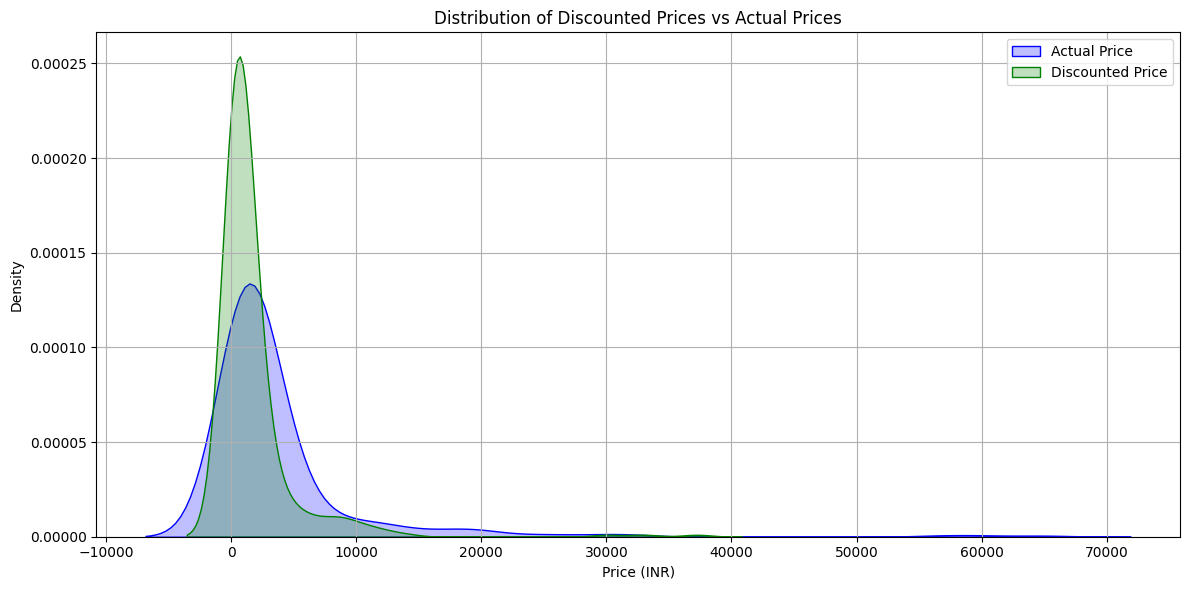

In [65]:
# ques 3  What is the distribution of discounted prices vs. actual prices?
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df = df.dropna(subset=['discounted_price', 'actual_price'])
plt.figure(figsize=(12, 6))
sns.kdeplot(df['actual_price'], label='Actual Price', fill=True, color='blue')
sns.kdeplot(df['discounted_price'], label='Discounted Price', fill=True, color='green')
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
#ques 4. How does the average discount percentage vary across categories
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df = df.dropna(subset=['discount_percentage'])
df['main_category'] = df['category'].astype(str).str.split('|').str[0]
avg_discount_by_category = (
    df.groupby('main_category')['discount_percentage']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
print("Average Discount Percentage by Main Category:")
print(avg_discount_by_category)

Average Discount Percentage by Main Category:
           main_category  discount_percentage
0  Computers&Accessories            59.530864
1            Electronics            55.876289
2           Home&Kitchen            48.379310
3         OfficeProducts             0.000000


In [70]:
# ques 5   What are the most popular product names
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df = df.dropna(subset=['rating_count', 'product_name'])
popular_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False)
popular_products = popular_products.drop_duplicates(subset='product_name')
print("Most Popular Product Names by Number of Reviews:")
print(popular_products.head(10))

Most Popular Product Names by Number of Reviews:
                                           product_name  rating_count
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0
214   Crypo™ Universal Remote Compatible with Tata S...         928.0
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0
147   Ambrane Fast 100W Output Cable with Type-C to ...         919.0
227   Rts™ High Speed 3D Full HD 1080p Support (10 M...         910.0


In [73]:
#ques 6  What are the most popular product keywords
import re
from collections import Counter

product_names = df['product_name'].dropna().str.lower()
all_keywords = []
for name in product_names:
    words = re.findall(r'\b[a-z]{3,}\b', name)
    all_keywords.extend(words)
keyword_counts = Counter(all_keywords).most_common(20)
for word, count in keyword_counts:
    print(f"{word}: {count}")

for: 204
with: 153
cable: 116
black: 96
and: 84
usb: 82
remote: 69
compatible: 66
type: 59
heater: 59
charging: 57
fast: 54
electric: 47
smart: 45
white: 44
led: 41
room: 36
home: 34
data: 33
control: 33


In [74]:
# ques 7 What are the most popular product reviews
popular_reviews = df['review_content'].dropna().value_counts().head(10)
print("Top 10 Most Common Product Reviews:")
print(popular_reviews)

Top 10 Most Common Product Reviews:
review_content
I trust this product! Works well with car play!,Very good quality and charging is fine. As good as original,Build quality is awesome, best lightening cable ever seen, better than a official  lightening from If ur looking for a cable close your eyes and go for it 🔥 or you can buy a (Amazon basics) one I was using that for past 3 years that a bit a cheaper side, I recommend both these cables had better build quality and value for money,Gr8 product overall,Just loved it, very good charging speed.,,Good quality,it well packed, all sealed coveredthe wire looks of a very good qualityrecommended!!!!                                                                                                                                                                                                                                                                                                                                                             

In [75]:
# ques 8 What is the correlation between discounted_price and rating
df['discounted_price'] = df['discounted_price'].astype(str).str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df_clean = df.dropna(subset=['discounted_price', 'rating'])
correlation = df_clean['discounted_price'].corr(df_clean['rating'])
print("Correlation between discounted_price and rating:", correlation)

Correlation between discounted_price and rating: 0.08151967980593863


In [76]:
# ques 9 What are the Top 5 categories based on the highest ratings
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Categories by Average Rating:")
print(top_categories)

Top 5 Categories by Average Rating:
category
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                   5.00
Electronics|Mobiles&Accessories|MobileAccessories|Photo&VideoAccessories|SelfieSticks            4.60
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                     4.50
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterFilters&Purifiers            4.45
Electronics|Mobiles&Accessories|MobileAccessories|Maintenance,Upkeep&Repairs|ScreenProtectors    4.40
Name: rating, dtype: float64


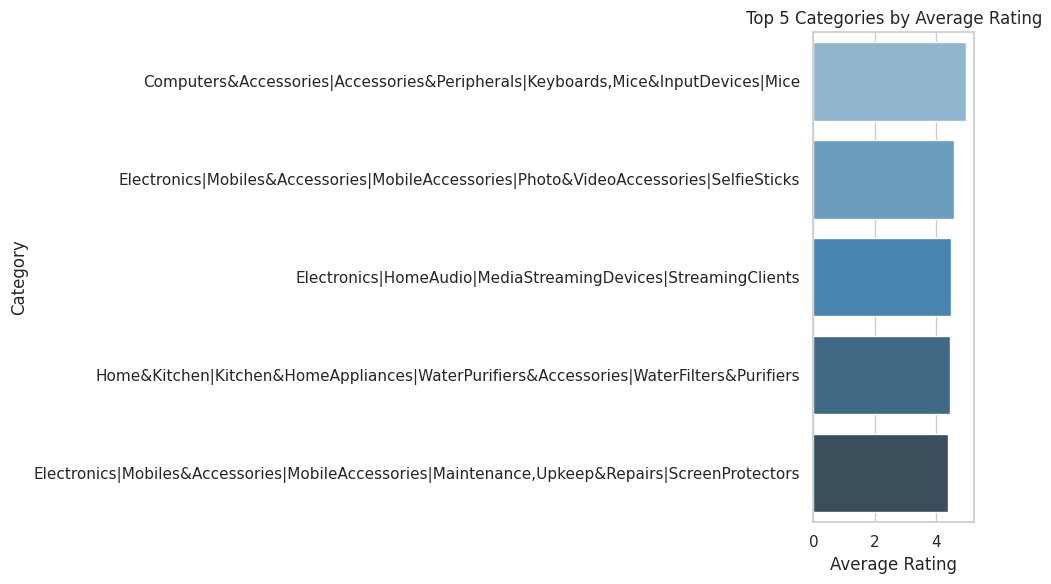

In [83]:
# ques 10 Identify any potential areas for improvement or optimization based on the data analysis
sns.set(style="whitegrid")
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_d")
plt.title("Top 5 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

**EDA - 4 spotify dataset**

In [84]:
df = pd.read_csv('/spotify.csv')

In [86]:
#ques 1   Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
print("🔍 Null values in each column:")
print(df.isnull().sum())
df_cleaned = df.dropna()
duplicate_count = df_cleaned.duplicated().sum()
print(f"\n🔁 Number of duplicate rows: {duplicate_count}")
df_cleaned = df_cleaned.drop_duplicates()
print(f"\n✅ Final data shape: {df_cleaned.shape}")

🔍 Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

🔁 Number of duplicate rows: 27

✅ Final data shape: (413, 5)


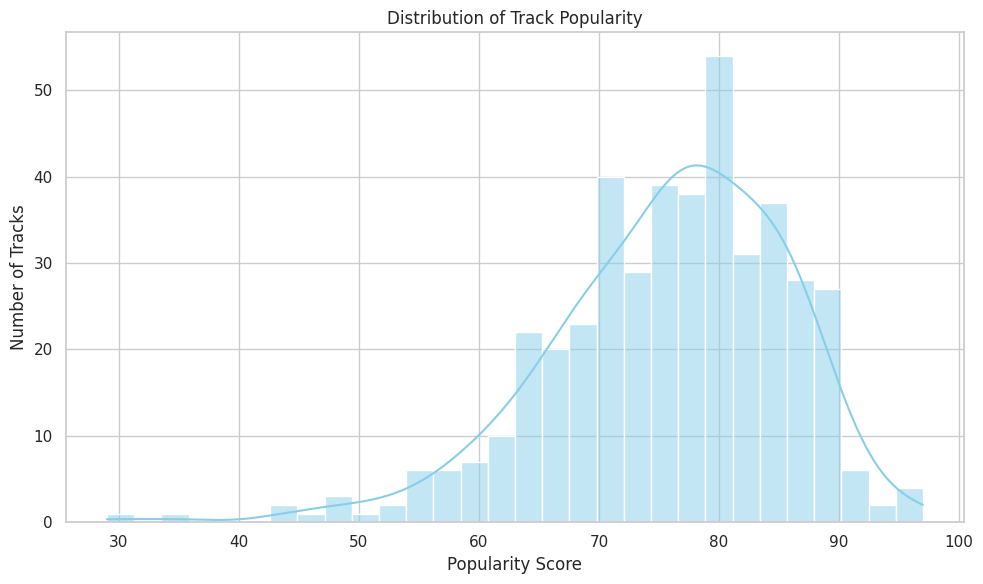

In [87]:
# ques 2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Number of Tracks")
plt.grid(True)
plt.tight_layout()
plt.show()

Column 'duration_min' or 'duration_ms' not found in DataFrame.


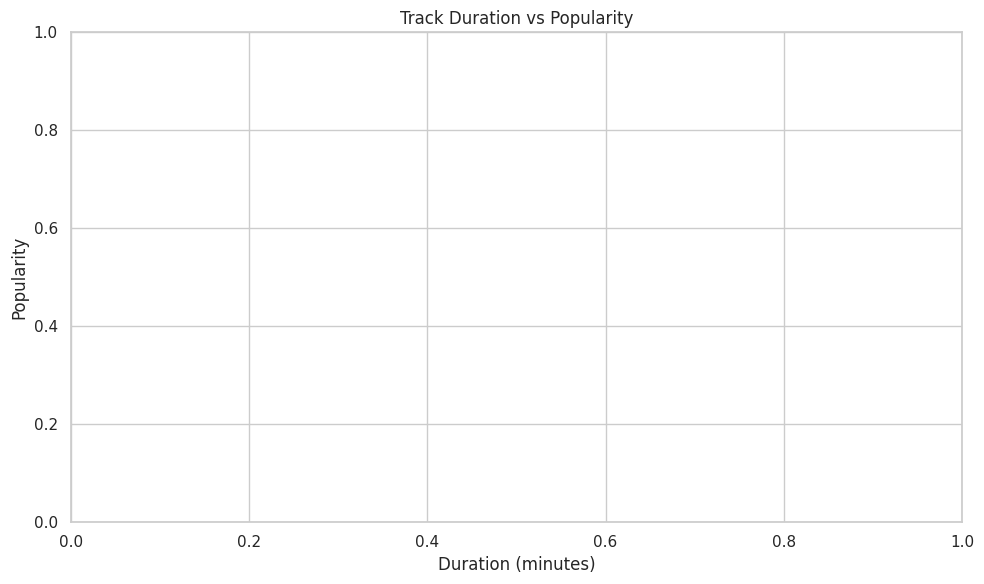

In [90]:
# ques  3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

plt.figure(figsize=(10, 6))
if 'duration_ms' in df.columns:
    df['duration_min'] = df['duration_ms'] / (60 * 1000)  # Convert milliseconds to minutes
    sns.scatterplot(x='duration_min', y='Popularity', data=df, alpha=0.6)
else:
    print("Column 'duration_min' or 'duration_ms' not found in DataFrame.")


plt.title("Track Duration vs Popularity")
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.grid(True)
plt.tight_layout()
plt.show()

The artist with the highest number of tracks is: Drake (20 tracks)


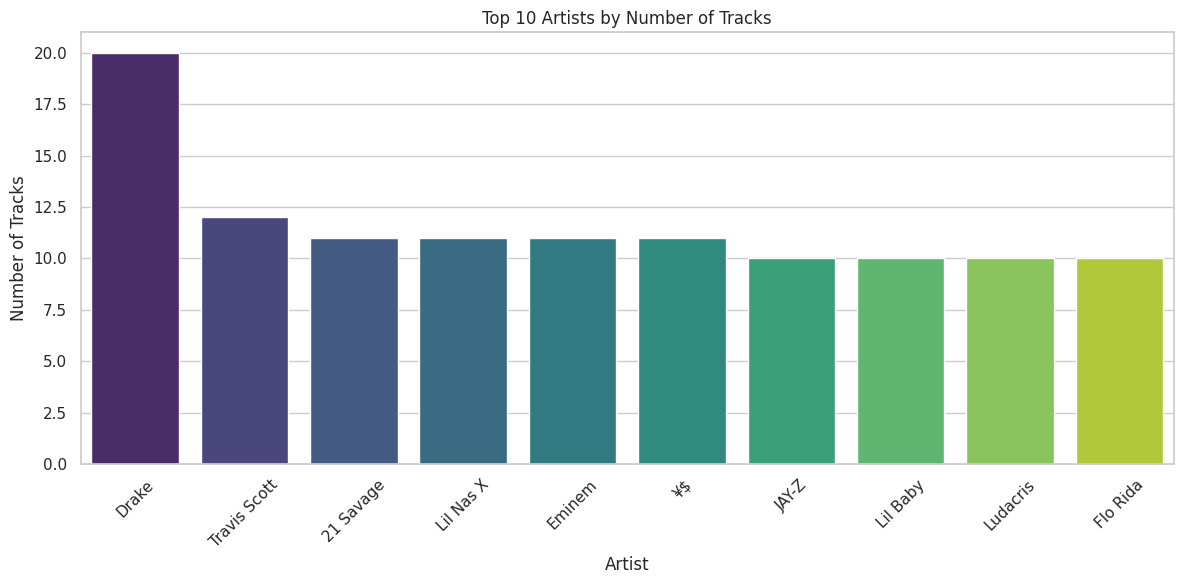

In [93]:
# ques 4  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
artist_track_counts = df['Artist'].value_counts()
top_artist = artist_track_counts.idxmax()
top_count = artist_track_counts.max()
print(f"The artist with the highest number of tracks is: {top_artist} ({top_count} tracks)")
top_artists = artist_track_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')

plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
# 5  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [96]:
# ques 6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

avg_popularity_per_artist = df.groupby('Artist')['Popularity'].mean()
track_counts = df['Artist'].value_counts()
top_5_artists = track_counts.head(5).index
top_5_avg_popularity = avg_popularity_per_artist[top_5_artists].sort_values(ascending=False)
print("Average Popularity for Top 5 Artists by Track Count:")
print(top_5_avg_popularity)
most_popular_artist = top_5_avg_popularity.idxmax()
highest_avg_popularity = top_5_avg_popularity.max()
print(f"\n🎤 The artist with the highest average popularity is **{most_popular_artist}** with a score of {highest_avg_popularity:.2f}")

Average Popularity for Top 5 Artists by Track Count:
Artist
Travis Scott    87.000000
21 Savage       84.181818
Eminem          83.636364
Drake           83.500000
Lil Nas X       76.090909
Name: Popularity, dtype: float64

🎤 The artist with the highest average popularity is **Travis Scott** with a score of 87.00


In [97]:
# ques 7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
avg_popularity_per_artist = df.groupby('Artist')['Popularity'].mean()
top_5_artists_by_avg_popularity = avg_popularity_per_artist.sort_values(ascending=False).head(5).index
print("Most Popular Track for Top 5 Artists:\n")

for artist in top_5_artists_by_avg_popularity:
    artist_tracks = df[df['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]

    print(f"🎤 Artist: {artist}")
    print(f"🎵 Most Popular Track: {most_popular_track['Track Name']} (Popularity: {most_popular_track['Popularity']})\n")

Most Popular Track for Top 5 Artists:

🎤 Artist: cassö
🎵 Most Popular Track: Prada (Popularity: 92)

🎤 Artist: Trueno
🎵 Most Popular Track: Mamichula - con Nicki Nicole (Popularity: 89)

🎤 Artist: David Guetta
🎵 Most Popular Track: Baby Don't Hurt Me (Popularity: 87)

🎤 Artist: Travis Scott
🎵 Most Popular Track: FE!N (feat. Playboi Carti) (Popularity: 93)

🎤 Artist: ¥$
🎵 Most Popular Track: CARNIVAL (Popularity: 96)



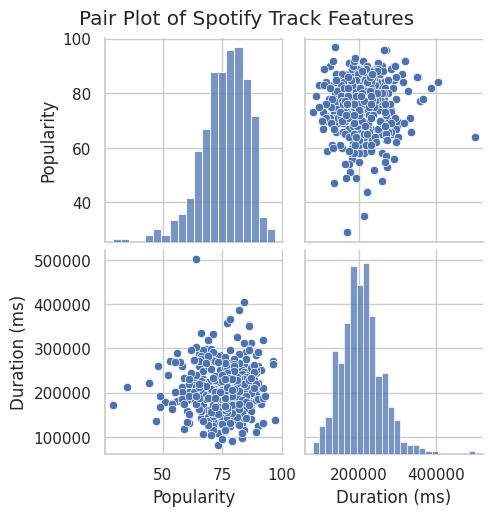

In [101]:
# ques 8  Visualize relationships between multiple numerical variables simultaneously using a pair plot
numeric_cols = ['Popularity', 'Duration (ms)']
sns.pairplot(df[numeric_cols])
plt.suptitle("Pair Plot of Spotify Track Features", y=1.02)
plt.show()

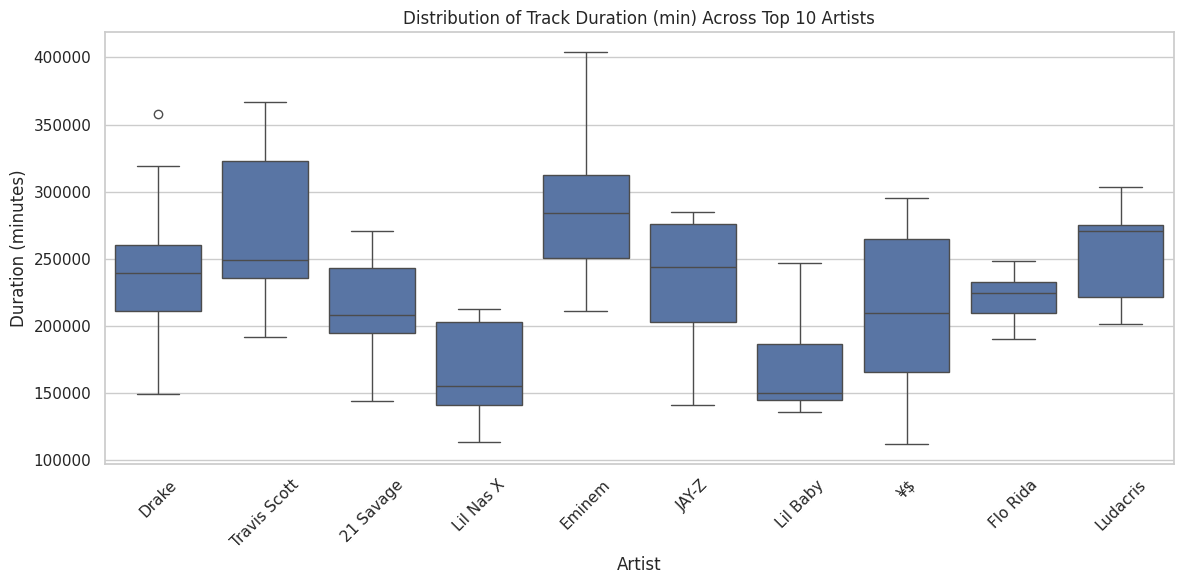

In [111]:
# 9  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
top_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_artists)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Artist', y='Duration (ms)')
plt.xticks(rotation=45)
plt.title('Distribution of Track Duration (min) Across Top 10 Artists')
plt.ylabel('Duration (minutes)')
plt.xlabel('Artist')
plt.tight_layout()
plt.show()

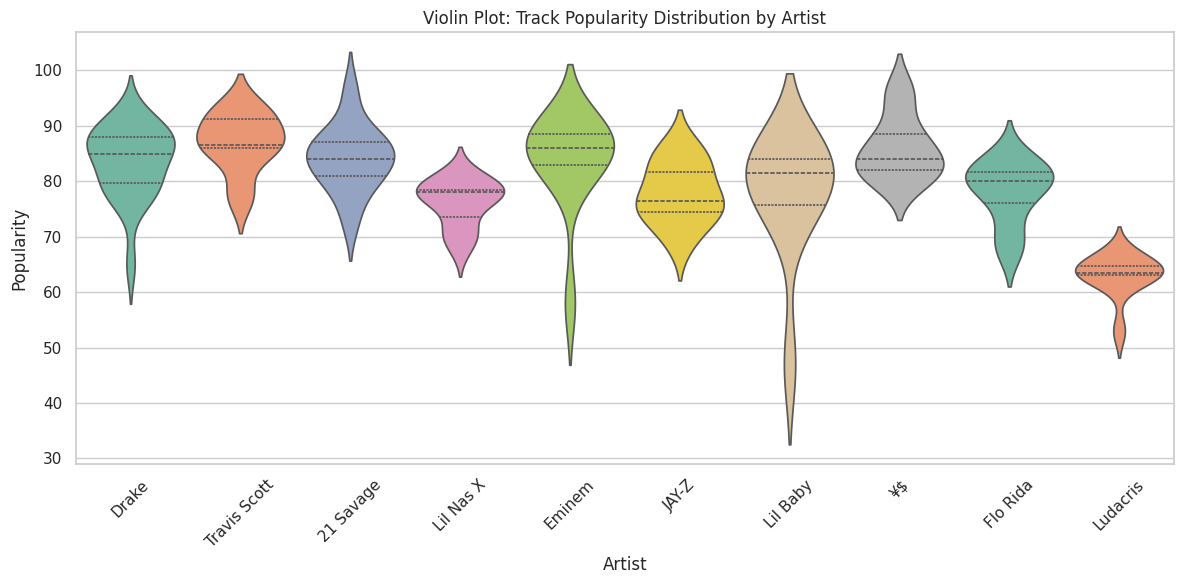

In [109]:
# 10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
top_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_artists)]
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', y='Popularity', inner='quartile', palette='Set2')
plt.title('Violin Plot: Track Popularity Distribution by Artist')
plt.ylabel('Popularity')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()